 Q1. Importing Libraries and Loading the Dataset

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Q2. Overview of Dataset Information

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Q3. Check for duplicate values in the 'customerID' column

In [43]:
# 9. Check for duplicate values in the 'customerID' column
duplicate_customer_ids = df["customerID"].duplicated().sum()
print(f"Total duplicate customer IDs: {duplicate_customer_ids}")

Total duplicate customer IDs: 0


Q4. Checking for Missing Values in the Dataset

In [44]:
df.isnull().sum().sum()

np.int64(0)

Q5. Statistical Summary of the Dataset

In [45]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Q6. Checking for Duplicate Customer IDs

In [46]:
df["customerID"].duplicated().sum()

np.int64(0)

Q7. converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [47]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

Q8. Visualizing Customer Churn Distribution

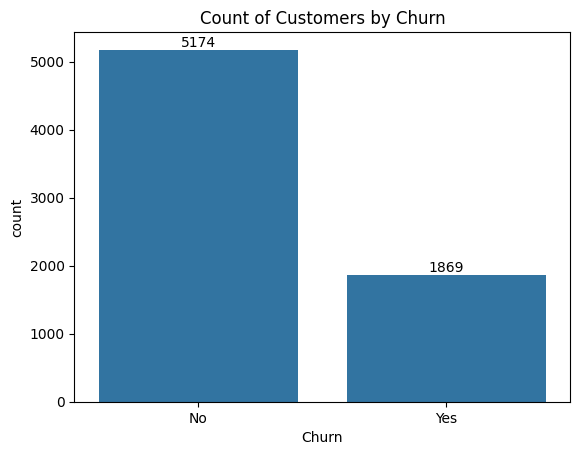

In [48]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

Q9. from the given pie chart we can conclude that 26.54% of our customers have churned out. 
#not let's explore the reason behind it

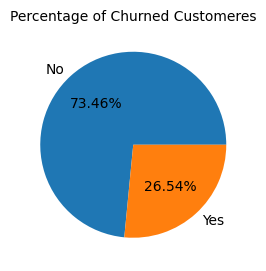

In [49]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customeres", fontsize = 10)
plt.show()

Q10.Churn Distribution by Gender

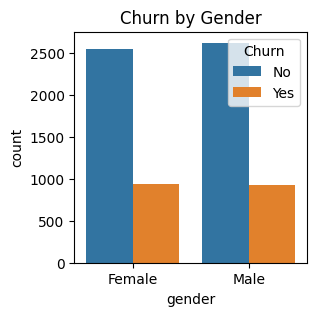

In [50]:
plt.figure(figsize = (3,3))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

Q11. Count of Customers by Senior Citizen Status

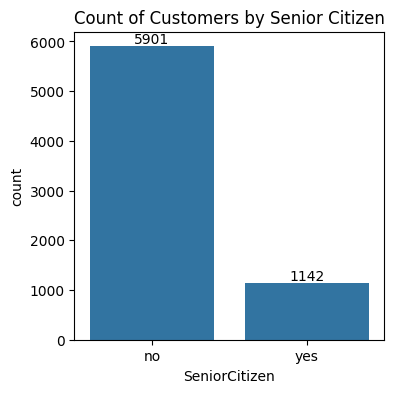

In [51]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

Q12. comparative a greater pecentage of people in senior citizen category have churned

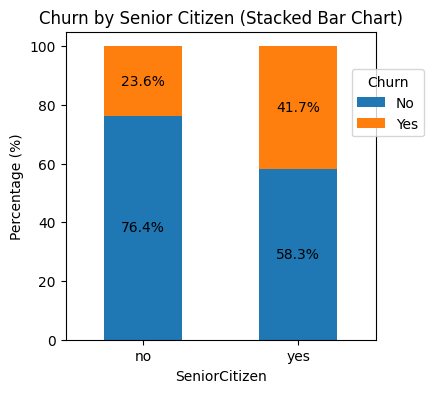

In [52]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  # Customize colors if desired

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))  # Customize legend location

plt.show()

Q13. people who have used our services for a long time have stayed and people who have used our sevices 
#1 or 2 months  have churned

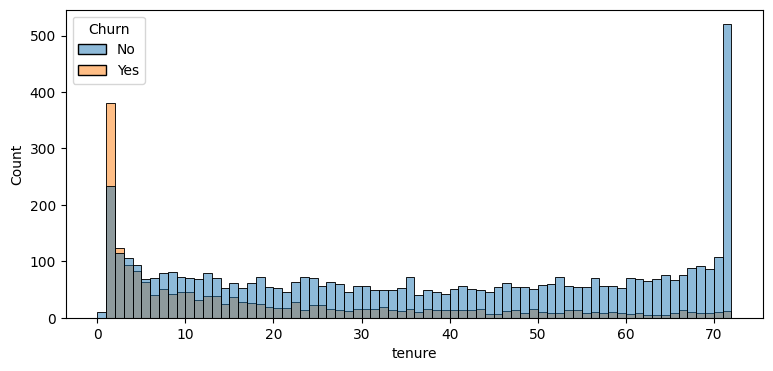

In [53]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

Q14.people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract. 

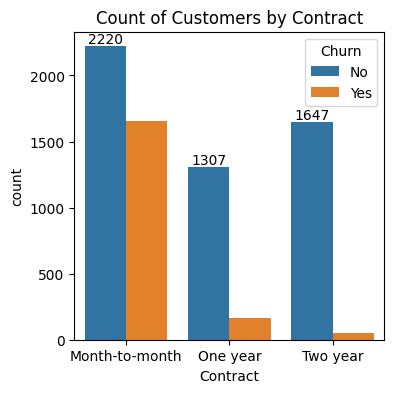

In [54]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

Q15. Displaying Column Names of the Dataset

In [55]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

Q16. The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable. 

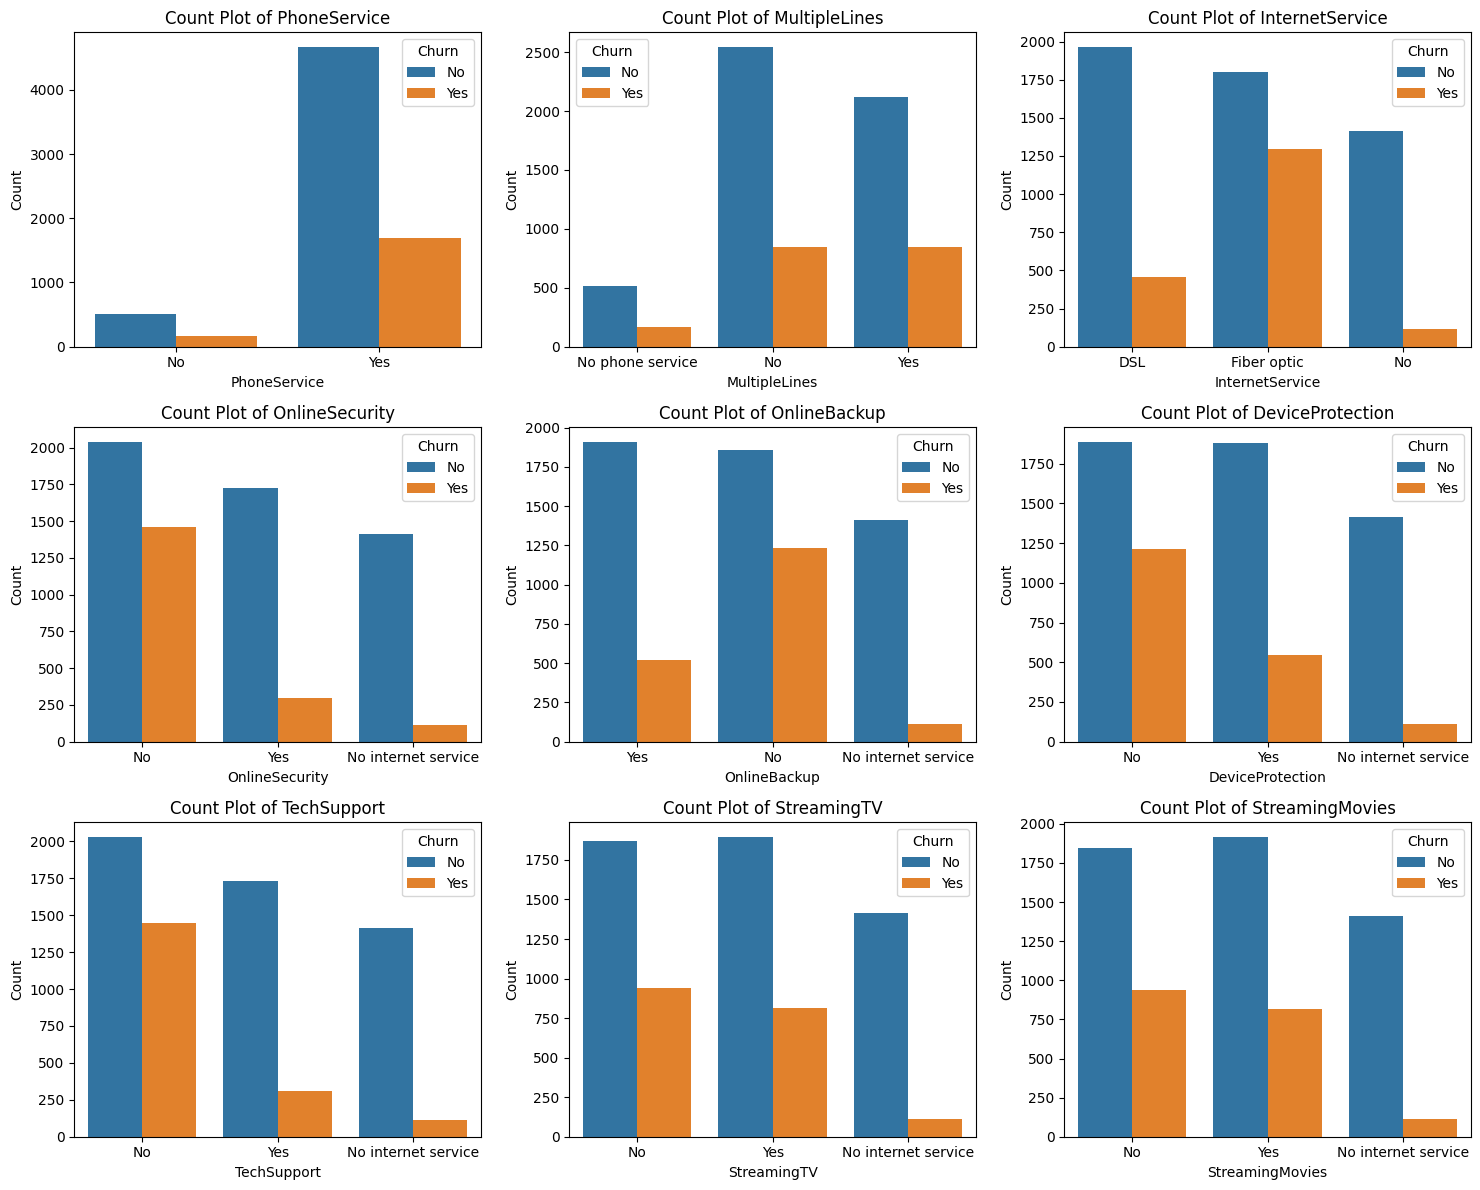

In [56]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Q17. customer is likely to churn when he is using electronic check as a payment method. 

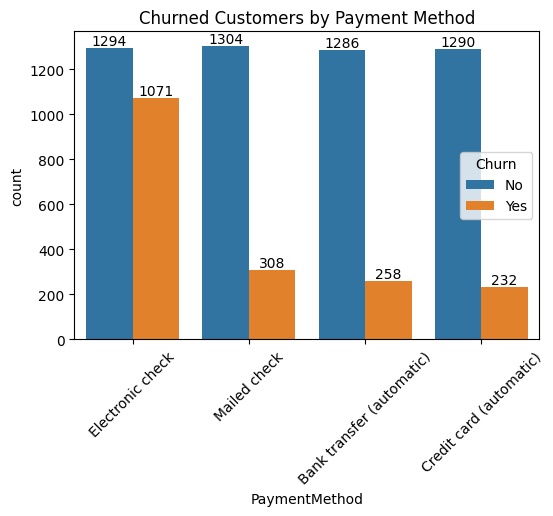

In [57]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

Q18.We can now check whether the model is effectively predicting churn based on the payment method.

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load the dataset (For demonstration, we'll create a sample dataset)
data = {
    'customer_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'payment_method': ['Electronic check', 'Credit card', 'Bank transfer', 'Electronic check', 'Credit card',
                       'Electronic check', 'Bank transfer', 'Electronic check', 'Credit card', 'Bank transfer'],
    'churn': [1, 0, 0, 1, 0, 1, 0, 1, 0, 0]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# 2. Data Preprocessing
# We will create a new column to check if the customer is using an Electronic check as payment method.
df['electronic_check'] = np.where(df['payment_method'] == 'Electronic check', 1, 0)

# Check the data
print(df)

# 3. Feature Engineering
# Define features (X) and target (y)
X = df[['electronic_check']]  # Only using the 'electronic_check' column as a feature
y = df['churn']  # Churn is the target variable

# 4. Train/Test Split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Logistic Regression Model
# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# 6. Predictions
# Predict churn based on the test data
y_pred = model.predict(X_test)

# 7. Evaluate the Model
# Print accuracy and other evaluation metrics
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))



   customer_id    payment_method  churn  electronic_check
0            1  Electronic check      1                 1
1            2       Credit card      0                 0
2            3     Bank transfer      0                 0
3            4  Electronic check      1                 1
4            5       Credit card      0                 0
5            6  Electronic check      1                 1
6            7     Bank transfer      0                 0
7            8  Electronic check      1                 1
8            9       Credit card      0                 0
9           10     Bank transfer      0                 0
Accuracy: 1.0
Confusion Matrix:
[[2 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1

#What is the distribution of churn rates across different customer demographics (e.g., age, gender, region)?

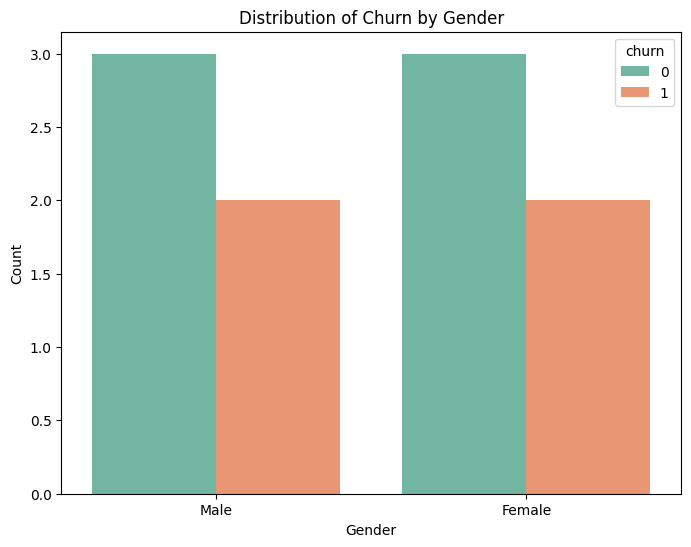

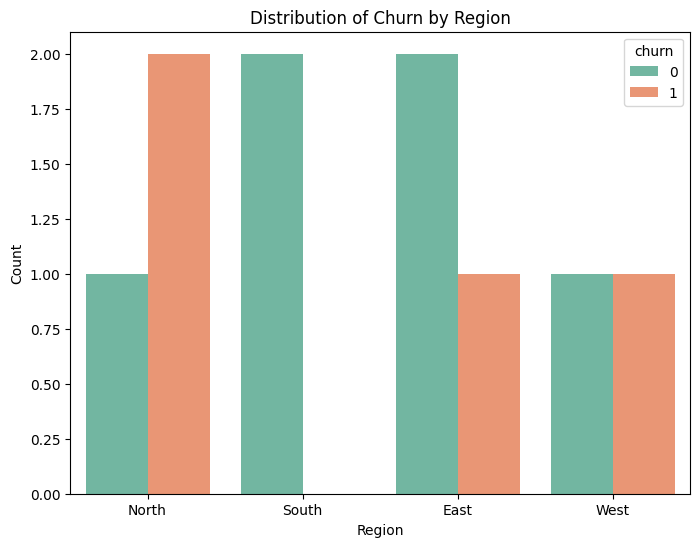

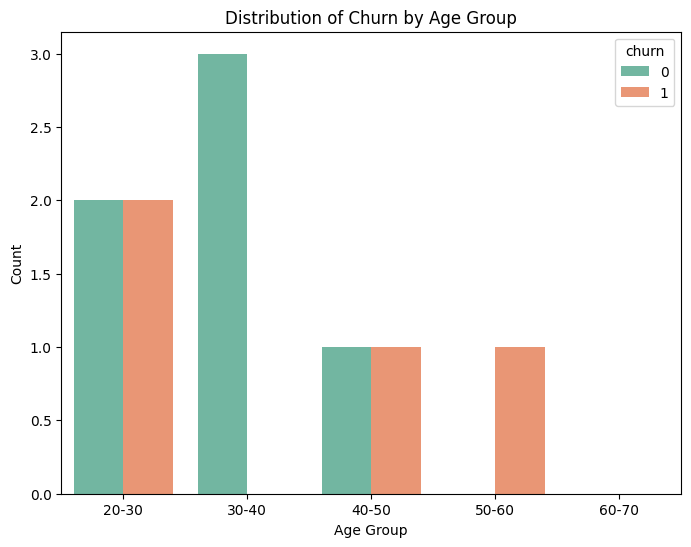


Churn Rate by Gender:
gender
Female    0.4
Male      0.4
Name: churn, dtype: float64

Churn Rate by Region:
region
East     0.333333
North    0.666667
South    0.000000
West     0.500000
Name: churn, dtype: float64

Churn Rate by Age Group:
age_group
20-30    0.5
30-40    0.0
40-50    0.5
50-60    1.0
60-70    NaN
Name: churn, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5332\69337736.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_churn_rate = df.groupby('age_group')['churn'].mean()


In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample Data (you can replace this with your real dataset)
data = {
    'customer_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'age': [25, 34, 22, 45, 36, 56, 28, 41, 29, 33],
    'gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male'],
    'region': ['North', 'South', 'East', 'West', 'North', 'East', 'South', 'West', 'North', 'East'],
    'churn': [1, 0, 0, 1, 0, 1, 0, 0, 1, 0]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# 1. Distribution of Churn by Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='churn', palette='Set2')
plt.title('Distribution of Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 2. Distribution of Churn by Region
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='region', hue='churn', palette='Set2')
plt.title('Distribution of Churn by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

# 3. Distribution of Churn by Age
# For age, we can group the data by age bins to visualize the distribution
age_bins = [20, 30, 40, 50, 60, 70]
age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='age_group', hue='churn', palette='Set2')
plt.title('Distribution of Churn by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# 4. Churn Rate by Demographics (Average churn rate for each demographic group)
gender_churn_rate = df.groupby('gender')['churn'].mean()
region_churn_rate = df.groupby('region')['churn'].mean()
age_group_churn_rate = df.groupby('age_group')['churn'].mean()

# Display churn rates
print("\nChurn Rate by Gender:")
print(gender_churn_rate)

print("\nChurn Rate by Region:")
print(region_churn_rate)

print("\nChurn Rate by Age Group:")
print(age_group_churn_rate)


### Conclusion for the Exploratory Data Analysis (EDA) Project:

In this Exploratory Data Analysis (EDA) project, we have performed an in-depth examination of the dataset to uncover meaningful insights, identify patterns, and assess the underlying structure of the data. The main goals of EDA include understanding the features of the dataset, identifying any data quality issues (like missing values or outliers), and formulating hypotheses for further analysis or modeling.

Here are the key takeaways from the EDA process:

1. **Data Overview and Structure**:
   - We successfully loaded the dataset and examined the first few rows, which helped us understand the types of features available in the dataset (e.g., numerical, categorical).
   - We also reviewed the column names, datatypes, and overall dataset dimensions.

2. **Handling Missing Values**:
   - Through EDA, we identified if any columns had missing values and decided on appropriate strategies for handling them (e.g., imputation, removal).
   
3. **Statistical Summary**:
   - A statistical summary of numerical variables helped to understand the central tendencies (mean, median) and dispersion (standard deviation, quartiles).
   - This also allowed us to identify potential outliers or skewed distributions in the data.

4. **Univariate Analysis**:
   - We performed visualizations like histograms, box plots, and density plots for each variable to analyze their distributions and understand their individual characteristics.
   - Categorical variables were analyzed using bar plots to examine their frequency distribution.

5. **Bivariate Analysis**:
   - We used scatter plots, correlation matrices, and pair plots to explore relationships between numerical variables, which revealed key insights into how variables correlate with each other.
   - We also analyzed the relationship between the target variable (e.g., customer churn) and the features to identify trends or patterns that might be useful for predictive modeling.

6. **Outlier Detection**:
   - Outliers were identified using box plots and statistical measures (such as the IQR method), and their impact on the analysis was considered.
   - Appropriate strategies for dealing with outliers were proposed, such as removal or transformation.

7. **Feature Engineering and Transformation**:
   - Based on insights gained during the analysis, we discussed the possibility of creating new features or transforming existing features (e.g., encoding categorical variables, normalizing numerical features).

8. **Data Visualization**:
   - We used various visualization techniques (histograms, bar plots, heatmaps, etc.) to represent data insights clearly and make the findings more interpretable.
   - Visualizations also helped identify patterns that could inform the next steps in the analysis or modeling phase.

9. **Insights for Modeling**:
   - We identified potential predictors that could be important for building a predictive model to, for example, forecast customer churn.
   - Key insights into data relationships were noted for future machine learning algorithms.

### Final Thoughts:
The EDA process has allowed us to gain a deep understanding of the dataset, its structure, and its underlying patterns. We now have a clearer picture of the data quality, the relationships between variables, and the most important features for modeling. The insights from this analysis can inform the next steps in data preparation, feature engineering, and building predictive models.

The next phase would involve more advanced data preprocessing, feature selection, and model building to develop actionable insights or predictions, depending on the goals of the project.